In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

# 파일 불러오기

In [3]:
# csv 파일을 읽고 Dateframe 으로 변환합니다. 한글 깨짐 방지를 위해 인코딩 파라미터를 추가합니다.
data = pd.read_csv('9_제주 관광을 위한 날짜별 지역 추천 데이터.csv', encoding='cp949')

# 컬럼 설명 

- 일자: 평균 기온, 일강수량, 최대 풍속을 기록한 날입니다. 하루 단위로 되어 있습니다.
    
- 시도명: 제주시와 서귀포시가 있습니다.

- 읍면동명: 제주시와 서귀포시 각각의 읍면동명이 있습니다.

- 평균기온: 섭씨온도 (℃)

- 일강수량: 일일강수량 (mm)

- 최대 풍속: (m/s)

- 업종명: 다양한 업종이 있습니다.

- 이용금액: 한달치 금액입니다. 하루치 금액이 아님에 주의합니다.
    
- 데이터기준일자: 데이터를 등록한 날짜입니다.

# 데이터 전처리

## 확인하기

In [4]:
# 테이블을 확인합니다.
data.head()

,일자,시도명,읍면동명,평균 기온,일강수량,최대 풍속,업종명,이용금액,데이터기준일자
0,2018-01-01,제주시,추자면,5.7,0.0,1.8,과실 및 채소 소매업,13569170,2020-12-15
1,2018-01-01,제주시,이도1동,2.9,0.0,2.4,중식 음식점업,18299000,2020-12-15
2,2018-01-01,제주시,이도1동,2.9,0.0,2.4,전시 및 행사 대행업,819550,2020-12-15
3,2018-01-01,제주시,이도1동,2.9,0.0,2.4,일식 음식점업,32160000,2020-12-15
4,2018-01-01,제주시,이도1동,2.9,0.0,2.4,일반유흥 주점업,199833010,2020-12-15


In [5]:
# 결측치가 없는 것을 확인합니다.
# 수치 데이터가 숫자형으로 되어있는지 확인합니다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1603367 entries, 0 to 1603366
Data columns (total 9 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   일자       1603367 non-null  object 
 1   시도명      1603367 non-null  object 
 2   읍면동명     1603367 non-null  object 
 3   평균 기온    1591259 non-null  float64
 4   일강수량     1601446 non-null  float64
 5   최대 풍속    1577476 non-null  float64
 6   업종명      1603367 non-null  object 
 7   이용금액     1603367 non-null  int64  
 8   데이터기준일자  1603367 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 110.1+ MB


In [6]:
# 업종 개수를 확인합니다.
data['업종명'].value_counts()

체인화 편의점                    57975
과실 및 채소 소매업                57975
한식 음식점업                    57975
슈퍼마켓                       57975
중식 음식점업                    57945
서양식 음식점업                   57491
수산물 소매업                    57424
비알콜 음료점업                   57248
육류 소매업                     56727
빵 및 과자류 소매업                56670
차량용 주유소 운영업                56273
여관업                        56221
일식 음식점업                    55614
스포츠 및 레크레이션 용품 임대업         55090
기타음식료품위주종합소매업              53218
기타 외국식 음식점업                52798
피자, 햄버거, 샌드위치 및 유사 음식점업    52787
그외 기타 종합 소매업               52143
차량용 가스 충전업                 51023
전시 및 행사 대행업                50728
욕탕업                        50483
관광 민예품 및 선물용품 소매업          50334
화장품 및 방향제 소매업              50140
기타 주점업                     47593
건강보조식품 소매업                 44496
일반유흥 주점업                   38185
여행사업                       34354
호텔업                        27587
골프장 운영업                    23953
그외 기타 스포츠시설 운영업            21209
휴양콘도 운영업  

In [7]:
# 읍면동명을 확인합니다.
data['읍면동명'].value_counts()

애월읍     116746
남원읍      94440
조천읍      80964
구좌읍      72714
대정읍      71561
아라동      69962
삼양동      68378
화북동      68356
효돈동      66696
송산동      52942
천지동      52458
한림읍      49480
한경면      45058
예래동      40977
성산읍      36254
연동       29098
노형동      28764
안덕면      25986
중문동      25982
이도2동     25622
대륜동      24890
외도동      24498
일도2동     24467
용담1동     24435
정방동      24313
중앙동      24313
삼도1동     24254
삼도2동     24072
표선면      23921
이도1동     23527
건입동      23464
오라동      22916
동홍동      22797
일도1동     22246
서홍동      21303
이호동      21034
용담2동     20575
도두동      19028
우도면      18967
영천동      17202
봉개동      16167
추자면      11965
대천동        575
Name: 읍면동명, dtype: int64

In [8]:
# 누락된 지역이 없는지 확인합니다.
# 제주시 행정구역은 4읍 + 3면 + 19동입니다.
# 서귀포 행정구역은 3읍 + 2면 + 12동입니다.
# 모두 합하면 26 + 17 = 43 개가 있습니다.
len(data['읍면동명'].unique())

43

## 제거하기

In [9]:
# 데이터기준일자 컬럼은 필요 없으므로 제거합니다
data.drop(['데이터기준일자'], axis=1, inplace=True)

## 추가하기

In [10]:
# datetime 컬럼을 만듭니다. 
data['datetime'] = pd.to_datetime(data['일자'])

In [11]:
# 만든 컬럼을 확인합니다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1603367 entries, 0 to 1603366
Data columns (total 9 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   일자        1603367 non-null  object        
 1   시도명       1603367 non-null  object        
 2   읍면동명      1603367 non-null  object        
 3   평균 기온     1591259 non-null  float64       
 4   일강수량      1601446 non-null  float64       
 5   최대 풍속     1577476 non-null  float64       
 6   업종명       1603367 non-null  object        
 7   이용금액      1603367 non-null  int64         
 8   datetime  1603367 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 110.1+ MB


In [12]:
# 데이터의 첫 날과 마지막 날을 확인합니다.
# 2018-01-01 부터 2020-04-30 까지 있습니다.
data['datetime'].min(), data['datetime'].max()

(Timestamp('2018-01-01 00:00:00'), Timestamp('2020-04-30 00:00:00'))

In [13]:
# 데이터의 전체 기간을 확인합니다.
# 총 850 일입니다.
data['datetime'].max() - data['datetime'].min()

Timedelta('850 days 00:00:00')

In [14]:
# 분기(quarter)와 달(month) 컬럼을 추가합니다.
data["quarter"] = data["datetime"].dt.quarter
data["month"] = data["datetime"].dt.month

In [15]:
# 추가된 컬럼을 확인합니다.
data.tail()

,일자,시도명,읍면동명,평균 기온,일강수량,최대 풍속,업종명,이용금액,datetime,quarter,month
1603362,2020-04-30,제주시,아라동,11.5,0.0,6.6,한식 음식점업,1305124430,2020-04-30,2,4
1603363,2020-04-30,제주시,아라동,11.5,0.0,6.6,화장품 및 방향제 소매업,11806070,2020-04-30,2,4
1603364,2020-04-30,서귀포시,표선면,18.1,0.0,4.7,휴양콘도 운영업,37804200,2020-04-30,2,4
1603365,2020-04-30,제주시,아라동,11.5,0.0,6.6,여행사업,8600000,2020-04-30,2,4
1603366,2020-04-30,제주시,애월읍,20.6,0.0,5.4,휴양콘도 운영업,6629916,2020-04-30,2,4


# 데이터 분석

------------------------------------------------------

첫 번째

        데이터 전체 기간 동안 (2018년 1월 1일부터 2020년 4월 30일까지) 가장 높은 이용금액을 가진 업종을 찾는다
        

------------------------------------------------------


In [43]:
dataHighSeries = data.groupby(['datetime', '읍면동명', '업종명'])['이용금액'].mean()
dataHighSeries.head()
dataHighDf = dataHighSeries

datetime    읍면동명  업종명              
2018-01-01  건입동   건강보조식품 소매업            1286200
                  과실 및 채소 소매업          14763300
                  관광 민예품 및 선물용품 소매업     3803050
                  기타 외국식 음식점업           9036400
                  기타 주점업               25510000
Name: 이용금액, dtype: int64

In [28]:
# 이용금액을 내림차순으로 정렬합니다.
data.sort_values(by='이용금액' , ascending=False).head()


,일자,시도명,읍면동명,평균 기온,일강수량,최대 풍속,업종명,이용금액,datetime,quarter,month
947368,2019-05-22,제주시,용담2동,22.4,0.0,4.9,면세점,10764369591,2019-05-22,2,5
948872,2019-05-23,제주시,용담2동,25.1,0.0,5.2,면세점,10764369591,2019-05-23,2,5
912894,2019-05-04,제주시,용담2동,18.0,0.0,2.5,면세점,10764369591,2019-05-04,2,5
942991,2019-05-20,제주시,용담2동,14.7,1.5,3.4,면세점,10764369591,2019-05-20,2,5
941199,2019-05-19,제주시,용담2동,21.2,1.5,4.8,면세점,10764369591,2019-05-19,2,5


- 분석: 코로나 이전(2019년도)에는 용담2동에 있는 면세점이 가장 높은 이용금액을 가지고 있다.

- 문제 제기: 코로나 이후에는 면세점이 다른 업종에 밀렸을까?

------------------------------------------------------

두 번째

        2020-01-01 부터 2020-04-30 사이에 가장 높은 이용금액을 가진 업종을 찾는다
        

------------------------------------------------------

In [17]:
# 2019년 이후의 행만 선택합니다.
dataSubset = data[
    data["datetime"].dt.year > 2019
]

In [39]:
# 이용금액을 내림차순으로 정렬합니다.
dataSubset.sort_values(by='이용금액' , ascending=False).head(50)

,일자,시도명,읍면동명,평균 기온,일강수량,최대 풍속,업종명,이용금액,datetime,quarter,month
1406339,2020-01-17,제주시,용담2동,3.5,0.0,2.1,면세점,8854495220,2020-01-17,1,1
1432979,2020-01-31,제주시,용담2동,4.0,0.0,2.6,면세점,8854495220,2020-01-31,1,1
1393651,2020-01-10,제주시,용담2동,4.7,0.0,1.9,면세점,8854495220,2020-01-10,1,1
1415175,2020-01-21,제주시,용담2동,4.3,0.0,2.1,면세점,8854495220,2020-01-21,1,1
1389041,2020-01-08,제주시,용담2동,5.3,7.5,5.7,면세점,8854495220,2020-01-08,1,1
1418151,2020-01-23,제주시,용담2동,8.8,2.5,1.3,면세점,8854495220,2020-01-23,1,1
1421325,2020-01-25,제주시,용담2동,9.7,3.5,3.1,면세점,8854495220,2020-01-25,1,1
1403351,2020-01-15,제주시,용담2동,2.6,0.0,1.8,면세점,8854495220,2020-01-15,1,1
1376456,2020-01-01,제주시,용담2동,2.4,0.0,1.4,면세점,8854495220,2020-01-01,1,1
1394916,2020-01-11,제주시,용담2동,5.2,0.0,1.6,면세점,8854495220,2020-01-11,1,1


- 분석: 코로나 초기(2020년 4월까지)에도 면세점이 가장 높은 이용금액을 가지고 있다.

- 한계점: 2020년 4월까지의 기록밖에 없어서, 최근 약 1년 동안의 면세점 이용금액은 확인 할 수 없다. 

- 결론: (보고서 때 작성할 것) 면세점 유동인구를 대상으로 음식점 개업을 추천한다.  

        - 면세점에 중국인들이 많을 것으로 예상되므로 관련 자료를 찾는다.  

        - 중국인들이 선호하는 음식을 찾는다. 고향의 음식이 그리운 사람들은 중식을,
          현지 음식을 원하는 사람들을 위해 중국인들이 좋아하는 한식을 찾는다.
          

나중에 정리

https://www.seoul.co.kr/news/newsView.php?id=20210618030003&wlog_tag3=naver

http://www.datasom.co.kr/news/articleView.html?idxno=100897#:~:text=%EC%A1%B0%EC%82%AC%EA%B2%B0%EA%B3%BC%20%EC%A4%91%EA%B5%AD%EC%9D%B8%EC%97%90%EA%B2%8C%20%EC%84%A0%ED%98%B8%EB%8F%84,%EC%B0%8C%EA%B0%9C(3.7%EC%A0%90)%EC%98%80%EB%8B%A4.

https://www.newspim.com/news/view/20160620000157

------------------------------------------------------

세 번째

        2020-01-01 부터 2020-04-30 사이에 면세점을 제외하고 높은 이용금액을 가진 업종을 찾는다
        

------------------------------------------------------

In [19]:
# 면세점을 제거합니다.
data2 = data[ data['업종명'] != '면세점' ]

In [20]:
# 필요한 컬럼만 추출하여 groupby 로 묶습니다. 
# 값에는 이용금액의 평균이 들어갑니다.
dataPopularSectorSeries = data2.groupby(['month','읍면동명', '업종명'])['이용금액'].mean()
dataPopularSectorSeries

month  읍면동명  업종명                    
1      건입동   건강보조식품 소매업                 7.854000e+05
             과실 및 채소 소매업                2.748931e+07
             관광 민예품 및 선물용품 소매업          3.178500e+06
             그외 기타 종합 소매업               1.000000e+05
             기타 외국식 음식점업                7.356787e+06
                                            ...     
12     효돈동   차량용 가스 충전업                 2.256921e+07
             차량용 주유소 운영업                2.294036e+08
             체인화 편의점                    4.581468e+07
             피자, 햄버거, 샌드위치 및 유사 음식점업    2.099224e+06
             한식 음식점업                    1.441372e+08
Name: 이용금액, Length: 14257, dtype: float64

In [21]:
# 시리즈를 데이터 프레임으로 변환합니다.
dataPopularSectorDataFrame = pd.DataFrame(data=dataPopularSectorSeries)
dataPopularSectorDataFrame.head()

이용금액
month 읍면동명 업종명                            
1     건입동  건강보조식품 소매업         7.854000e+05
           과실 및 채소 소매업        2.748931e+07
           관광 민예품 및 선물용품 소매업  3.178500e+06
           그외 기타 종합 소매업       1.000000e+05
           기타 외국식 음식점업        7.356787e+06

In [27]:
# 이용금액이 높은 순으로 정렬합니다.
dfPS = dataPopularSectorDataFrame.sort_values(by='이용금액', ascending=False)
dfPS.head(30)

,,,이용금액
month,읍면동명,업종명,
7,연동,정기 항공 운송업,6.213297e+09
1,연동,정기 항공 운송업,5.605136e+09
5,연동,정기 항공 운송업,5.223140e+09
12,연동,정기 항공 운송업,5.160813e+09
6,연동,정기 항공 운송업,4.975993e+09
10,연동,정기 항공 운송업,4.929810e+09
12,연동,한식 음식점업,4.697101e+09
8,연동,정기 항공 운송업,4.536733e+09
5,연동,한식 음식점업,4.535280e+09


- 결론: 면세점을 제외 할 경우 지역별 이용금액 순위는 다음과 같다.

    1. 정기 항공 운송업 (연동)  

    2. 한식 음식점업 (연동)  

    3. 한식 음식점업 (노형동)  

    4. 한식 음식점업 (이도2동)  

    5. 슈퍼마켓 (이도2동)  

    6. 호텔업 (예래동)

- 시각화 해보기

In [30]:
# 상위 5 개 업종만 추출합니다.
dataTop5 = data[
    (data['업종명'] == '면세점') |
    (data['업종명'] == '정기 항공 운송업') |     
    (data['업종명'] == '한식 음식점업') |
    (data['업종명'] == '슈퍼마켓') |
    (data['업종명'] == '호텔업') 
]
dataTop5.head()

,일자,시도명,읍면동명,평균 기온,일강수량,최대 풍속,업종명,이용금액,datetime,quarter,month
10,2018-01-01,제주시,이도1동,2.9,0.0,2.4,슈퍼마켓,174857516,2018-01-01,1,1
23,2018-01-01,제주시,이도1동,2.9,0.0,2.4,한식 음식점업,415041401,2018-01-01,1,1
27,2018-01-01,제주시,일도2동,2.9,0.0,2.4,슈퍼마켓,525383376,2018-01-01,1,1
43,2018-01-01,제주시,이도1동,2.9,0.0,2.4,호텔업,316614190,2018-01-01,1,1
54,2018-01-01,제주시,용담1동,2.9,0.0,2.4,호텔업,14673000,2018-01-01,1,1


In [31]:
# 필요한 컬럼만 추출합니다.
dataTop5Columns = dataTop5[['datetime', '업종명', '이용금액']]
dataTop5Columns.head()

,datetime,업종명,이용금액
10,2018-01-01,슈퍼마켓,174857516
23,2018-01-01,한식 음식점업,415041401
27,2018-01-01,슈퍼마켓,525383376
43,2018-01-01,호텔업,316614190
54,2018-01-01,호텔업,14673000


In [32]:
# 업종명을 long to wide table format 으로 변경
# 참고: pivot 을 쓰면 인덱스 오류가 나지만 pivot_table 을 쓰면 오류가 나지 않는다.
dataTop5LongToWide = dataTop5Columns.pivot_table(index='datetime', columns='업종명', values='이용금액')
dataTop5LongToWide.head()

업종명,면세점,슈퍼마켓,정기 항공 운송업,한식 음식점업,호텔업
datetime,,,,,
2018-01-01,1.598234e+09,3.445595e+08,5.849643e+09,9.542843e+08,1.874981e+08
2018-01-02,1.598234e+09,3.445595e+08,5.849643e+09,9.542843e+08,1.874981e+08
2018-01-03,1.598234e+09,3.445595e+08,5.849643e+09,9.542843e+08,1.874981e+08
2018-01-04,1.598234e+09,3.445595e+08,5.849643e+09,9.542843e+08,1.874981e+08
2018-01-05,1.598234e+09,3.445595e+08,5.849643e+09,9.542843e+08,1.874981e+08


<AxesSubplot:xlabel='datetime'>

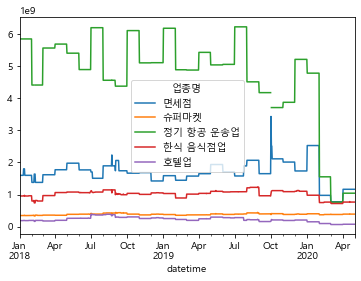

In [33]:
dataTop5LongToWide.plot()

In [ ]:
제주도에 많은 중국인이 있고 많은 돈을 쓰고 있다


------------------------------------------------------

네 번째
        
        "비가 많이 오는 날에는 편의점의 이용금액이 감소한다"는 가설을 검증한다.
                
------------------------------------------------------

- 관련 기사: (https://www.hankyung.com/economy/article/202106106586i)

- 문제점

    이용금액은 하루치가 아닌 한달치로 기록이 되어 있어 최소 월 단위로 비교를 해야 한다.
    그러나 비가 한달 내내 내리진 않으므로 비를 오는 날과 그렇지 않은 날을 구분하기 위해서는 이용금액이 일 단위로           기록되어야 한다.  

- 결론

    현재 데이터로는 비가 오는 날에 어떤 영향이 있는지 파악하기 힘들다.

------------------------------------------------------

다섯번 째
        
        여름(6, 7, 8월) 날씨를 비교해 본다
                
------------------------------------------------------

In [40]:
# 편의점 데이터만 추출합니다.
convenienceStore = data[data['업종명'] == '체인화 편의점']

In [ ]:
# 6, 7, 8월의 데이터만 추출합니다.


In [43]:
convenienceStore.sort_values(by='일강수량', ascending=False).head(10)

,일자,시도명,읍면동명,평균 기온,일강수량,최대 풍속,업종명,이용금액,datetime,quarter,month
436822,2018-08-23,제주시,애월읍,18.9,901.5,11.7,체인화 편의점,609281257,2018-08-23,3,8
436956,2018-08-23,제주시,아라동,18.5,828.5,10.7,체인화 편의점,525610350,2018-08-23,3,8
435849,2018-08-23,제주시,애월읍,17.5,798.0,12.7,체인화 편의점,609281257,2018-08-23,3,8
1058455,2019-07-20,제주시,아라동,17.4,591.5,8.3,체인화 편의점,527663550,2019-07-20,3,7
436749,2018-08-23,서귀포시,중문동,19.3,587.0,6.6,체인화 편의점,229615170,2018-08-23,3,8
1182401,2019-09-22,제주시,연동,14.6,583.5,4.5,체인화 편의점,959175880,2019-09-22,3,9
1182387,2019-09-22,제주시,노형동,14.6,583.5,4.5,체인화 편의점,757311675,2019-09-22,3,9
1056841,2019-07-19,제주시,애월읍,17.5,555.0,7.8,체인화 편의점,611669580,2019-07-19,3,7
1057583,2019-07-19,제주시,아라동,18.6,549.0,7.5,체인화 편의점,527663550,2019-07-19,3,7
1182222,2019-09-22,제주시,애월읍,11.4,525.0,7.4,체인화 편의점,506401390,2019-09-22,3,9


In [44]:
convenienceStore.sort_values(by='일강수량', ascending=True).head(10)
# 비가 많이 오는 경우
# 비가 많이 오지 않는 경우
# 그래프로 차이 비교

,일자,시도명,읍면동명,평균 기온,일강수량,최대 풍속,업종명,이용금액,datetime,quarter,month
21,2018-01-01,제주시,이도1동,2.9,0.0,2.4,체인화 편의점,96546840,2018-01-01,1,1
951677,2019-05-25,제주시,한림읍,22.9,0.0,3.5,체인화 편의점,291807120,2019-05-25,2,5
951687,2019-05-25,제주시,노형동,20.7,0.0,2.5,체인화 편의점,743524205,2019-05-25,2,5
951693,2019-05-25,제주시,화북동,20.4,0.0,3.1,체인화 편의점,174736685,2019-05-25,2,5
951702,2019-05-25,서귀포시,정방동,22.3,0.0,1.7,체인화 편의점,388120240,2019-05-25,2,5
951745,2019-05-25,서귀포시,중문동,16.8,0.0,2.1,체인화 편의점,205774660,2019-05-25,2,5
951766,2019-05-25,서귀포시,송산동,22.3,0.0,1.7,체인화 편의점,642736750,2019-05-25,2,5
951775,2019-05-25,제주시,건입동,19.6,0.0,1.8,체인화 편의점,132160420,2019-05-25,2,5
951820,2019-05-25,제주시,도두동,23.2,0.0,2.0,체인화 편의점,87425850,2019-05-25,2,5
951873,2019-05-25,서귀포시,천지동,22.3,0.0,1.7,체인화 편의점,507112300,2019-05-25,2,5


In [69]:
# 제주시에 한림읍에 있는 편의점을 분석한다.
# 한림읍은 
data[data['시도명'] == '제주시']['읍면동명'].unique()

array(['추자면', '이도1동', '일도2동', '이도2동', '용담1동', '일도1동', '삼도2동', '삼도1동',
       '용담2동', '오라동', '아라동', '애월읍', '외도동', '이호동', '도두동', '조천읍', '삼양동',
       '화북동', '봉개동', '건입동', '한림읍', '한경면', '구좌읍', '연동', '노형동', '우도면'],
      dtype=object)

------------------------------------------------------

앞으로 할 일

    - 날씨에 따른 무언가를 비교를 해야하는데..... -> 여름 6,7,8 월 끼리 비교 강수량, 기온
    
    - 여름과 겨율 해수욕장 근처의 상권 매출 비교 -> 여름 해수욕장 근처에 잘 되는 것? 아이스크림! 편의점 매출 보자
    - 도민들이 많은 곳의 상권 매출 비교 -> 해수욕장 편의점과 비교
    - correlation 그릴 수 있을까?

    - 계절 별로 음식점 메뉴 추천하기
    
------------------------------------------------------

In [ ]:
'''

제주도 친구로 부터의 정보

도민들은 시내에서 주로 놀지만
관광객들은 주로 해수욕장 같이 여행으로서 즐길 수 있는 곳에 많이 있다
따라서 관광객과 도민들이 모이는 곳이 차이가 많이 난다는 것을 알고 있어야 한다
또한 여름과 겨울에 관광하는 장소가 다르다

관광객들이 많이 오는 곳 top3
협재 해수욕장 -> 제주시 한림읍
함덕 해수욕장
중문 관광단지
 
도민들이 많이 있는 곳
제주 시청
제원 누웨마루거리



코로나 초기에는 제주도 상권이 좋지 않았지만 현재는 사람들이 아주 많이 온다
작년대비 체감상 1.5에서 2배 정도 성장한 것 같다

'''